In [68]:
%load_ext zipline
%matplotlib inline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


In [115]:
from zipline.utils import factory
from zipline.api import symbol, order, record
import numpy as np
from datetime import datetime, date
import pytz
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import os
import collections
from StringIO import StringIO

dictData = collections.OrderedDict()

parse = lambda x: datetime.strptime(x, '%d-%m-%y').date()

dict={}
array = ['DOGEBTC','MAIDBTC','DASHBTC','LTCUSD','XRPUSD','BTCETH','BTSBTC','XMRBTC','BTCUSD','FCTBTC']

for x in array:
    dict["{0}".format(x)] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/'+x+'.csv', index_col=['Timestamp'], 
                                  usecols=['Timestamp','Open','High','Low','Close','Volume'], sep=';',
                                  parse_dates=True, date_parser=parse)

dictData = dict
# dogebtc = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/DOGEBTC.csv', index_col=['Timestamp'], 
#                                   usecols=['Timestamp','Open','High','Low','Close','Volume'], sep=';',
#                                   parse_dates=True, date_parser=parse)





# dictData['DOGEBTC'] = dogebtc

# dictData['MAIDBTC'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/MAIDBTC.csv', index_col=['Timestamp'], usecols=['Timestamp','Open','High','Low','Close','Volume','VWAP','TWAP'], sep=';')
# dictData['DASHBTC'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/DASHBTC.csv', parse_dates=True, index_col=False, date_parser=parse, sep=';')
# dictData['LTCUSD'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/LTCUSD.csv', parse_dates=True, index_col=False, date_parser=parse, sep=';')
# dictData['XRPUSD'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/XRPUSD.csv', parse_dates=True, index_col=False, date_parser=parse, sep=';')
# dictData['BTCETH'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/BTCETH.csv', parse_dates=True, index_col=False, date_parser=parse, sep=';')
# dictData['BTSBTC'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/BTSBTC.csv', parse_dates=True, index_col=False, date_parser=parse, sep=';')
# dictData['XMRBTC'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/XMRBTC.csv', parse_dates=True, index_col=False, date_parser=parse, sep=';')
# dictData['BTCUSD'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/BTCUSD.csv', index_col=['Timestamp'], usecols=['Timestamp','Open','High','Low','Close','Volume','VWAP','TWAP'], sep=';')
# print(dictData['DOGEBTC'])

In [116]:
panel = pd.Panel(dictData)
panel.minor_axis = ['open', 'high', 'low', 'close', 'volume']
print(panel)
# print(panel.minor_axis)
# print(panel['DOGEBTC'])

<class 'pandas.core.panel.Panel'>
Dimensions: 10 (items) x 803 (major_axis) x 5 (minor_axis)
Items axis: BTCETH to XRPUSD
Major_axis axis: 2014-04-01 00:00:00 to 2016-06-11 00:00:00
Minor_axis axis: open to volume


In [117]:
sim_params = factory.create_simulation_parameters(
    start=pd.to_datetime("01-04-14", dayfirst=True).tz_localize("Europe/London").tz_convert("UTC"),
    end=pd.to_datetime("11-06-16", dayfirst=True).tz_localize("Europe/London").tz_convert("UTC"),
    data_frequency="daily",
    emission_rate="daily")

#data = data.dropna()

In [148]:
from zipline.algorithm import TradingAlgorithm
from zipline.api import order, symbol, get_datetime
from zipline.utils import tradingcalendar as tcal


import matplotlib.pyplot as plt

# 01-04-14
# BTC, LTC, DOGE
# 
# 01-05-14
# BTC, LTC, DOGE, DASH, XRP
# 
# 01-07-14
# BTC, LTC, DOGE, DASH, XRP, MAID, XMR
# 
# 01-10-14
# BTC, LTC, DOGE, DASH, XRP, MAID, XMR, BTS
# 
# 01-09-15
# BTC, LTC, DOGE, DASH, XRP, MAID, XMR, BTS, ETH
# 
# 01-02-16
# BTC, LTC, DOGE, DASH, XRP, MAID, XMR, BTS, ETH, FCT

def initialize(algo):
    algo.days = [date(2014,4,1),date(2014,5,1),date(2014,7,1),date(2014,10,1),date(2015,9,1),date(2016,2,1)]

# This will be the ETF trading 'strategy'
def handle_data(algo, data):
    
    # trading_days = tcal.get_trading_days((2014,4,1),(2016,5,1))
    # print(trading_days)

    # y = data['BTCUSD'].datetime.year  
    # m = data['BTCUSD'].datetime.month  
    # d = data['BTCUSD'].datetime.day  
    #event_day = date(2014,4,1)
    event_day = get_datetime(None).date()
    # 
    # 
    #order(symbol('DOGEBTC'), 100000000)
    for day in algo.days:  
        if event_day == algo.days[0]:  
             order(symbol('BTCUSD'), 1)
             order(symbol('LTCUSD'), 10)
             order(symbol('DOGEBTC'), 100)
        if event_day == algo.days[1]: 
            order(symbol('XRPUSD'), 1000)
            order(symbol('DASHBTC'), 10000)
        if event_day == algo.days[2]:
            order(symbol('MAIDBTC'), 10000)
            order(symbol('XMRBTC'), 10000)
        if event_day == algo.days[3]:
            order(symbol('BTSBTC'), 10000)
        if event_day == algo.days[4]:
            order(symbol('BTCETH'), 10000)
        if event_day == algo.days[5]:
            order(symbol('FCTBTC'), 10000)




algo_obj = TradingAlgorithm(initialize=initialize, handle_data=handle_data, sim_params=sim_params)
perf_manual = algo_obj.run(data=panel, overwrite_sim_params=False)


#def analyze(algo, perf_manual):







 
 
# ax2 = plt.subplot(212, sharex=ax1)
# perf_manual.DOGEBTC.plot(ax=ax2)
# 
# 
# plt.gcf().set_size_inches(18, 8)
# plt.show()

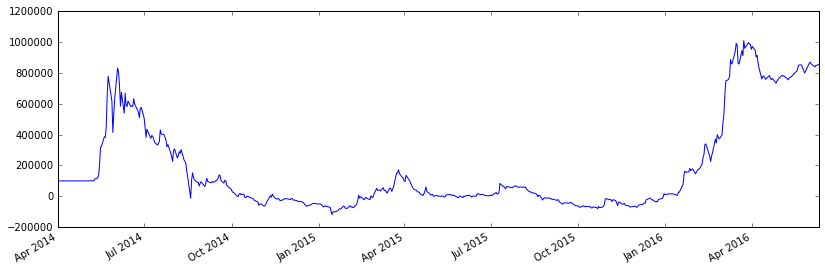

In [149]:
# This works fine
# ax1 = plt.subplot(621)
# del dogebtc['Volume']
# dogebtc.plot(ax=ax1)
# plt.ylabel('price')
# # ax1.lines.pop(4)
# plt.setp(ax1.get_xticklabels(), visible=True)

# Portfolio value
ax1 = plt.subplot(621)
perf_manual.portfolio_value.plot(ax=ax1)


plt.gcf().set_size_inches(30,30)
#plt.savefig('15.png',bbox_inches='tight')
plt.show()